# library

In [ ]:
%%capture
!pip install stellargraph
!pip install pretty-confusion-matrix
!pip install numpy
!pip install matplotlib==3.1.3
!pip install tensorflow
!pip install pandas
!pip install kaggle

In [ ]:
from   pretty_confusion_matrix import pp_matrix, pp_matrix_from_data
from IPython.display import display_html
from   string import ascii_uppercase
from itertools import chain,cycle
from google.colab import files
from   scipy import interp
import stellargraph as sg
import seaborn as sn 
import numpy as np
import json

from   pandas import DataFrame
import pandas as pd

from   matplotlib.collections import QuadMesh
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from   matplotlib import pyplot

from   tensorflow.keras.layers import Dense, Activation, Dropout
from   tensorflow.keras.models import Sequential, load_model
from   tensorflow.keras.metrics import Recall, Precision
from   tensorflow.keras.callbacks import EarlyStopping
from   tensorflow.keras.optimizers import Adam
from   tensorflow.keras.utils import plot_model
import tensorflow as tf

from   keras.callbacks import *

from   sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from   sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder, Normalizer
from   sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.datasets import make_classification
from   sklearn import preprocessing, metrics, svm
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.decomposition import PCA
from   sklearn.svm import SVC

# **test hardware**

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
import tensorflow as tf
import timeit
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('\n\n error configur notebook to use a GPU.')
  raise SystemError('GPU device not found')
def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)
def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
cpu()
gpu()
print('CPU (s):'+str(timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")))
print('GPU (s):'+str(timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")))

# DATA BASE

## **download database**

In [ ]:
! mkdir ~/.kaggle

In [ ]:
# upload kaggle.json after downloading it from your kaggle profile or put that code in the line 5
x = json.dumps ('test')
y = x.encode('utf-8')
with open('kaggle.json', 'w') as f:
  f.write('{"username":"abdoubrahmia","key":"9d9d19677f6db08fca9845e216c4e16f"}')

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%%capture
! kaggle datasets download mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot -f "Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv"
! unzip DNN-EdgeIIoT-dataset.csv.zip

In [ ]:
#loading dataset
#DNN-EdgeIIoT-dataset
dataset_origine = pd.read_csv('DNN-EdgeIIoT-dataset.csv', low_memory=False) 

## **display all data-base informations**

In [ ]:
def display_type_celles(df,size): #size is number of ligne max 
  df_datatypes = pd.DataFrame(df.dtypes)
  value_display=""
  for i in range(0,df_datatypes.shape[0],size):
    if i+size<df_datatypes.shape[0]:
      value_display+= df_datatypes[i:i+size].style.set_table_attributes("style='display:inline'").set_caption('')._repr_html_()
    else:
      value_display+= df_datatypes[i:].style.set_table_attributes("style='display:inline'").set_caption('')._repr_html_()
  display_html(value_display, raw=True)

def affiche_dataset_informations(df,size):
  pd.options.display.max_columns = None
  pd.options.display.max_rows = None
  display(df.describe())
  display(df.head(3))
  display_type_celles(df,size)

def plot_count_dataset(df):
  fig, ax =plt.subplots(1,2, figsize=(40,15), gridspec_kw={'width_ratios': [1, 2]})
  sn.countplot(ax=ax[0],y='Attack_label',palette="Set1",edgecolor=".6",data=df) #Set2   #bat 1
  sn.countplot(ax=ax[1],y='Attack_type' ,palette="Set1",edgecolor=".6",data=df) #Set2   #bat2
  plt.figure(figsize=(10,10)) #pie
  df["Attack_type"].value_counts()[1::].plot.pie(autopct='%.2f')
  plt.axes().set_xlabel('')
  plt.axes().set_ylabel('')

def display_count_dataset(df,attack):
  n_by_state = df.groupby(attack)[attack].count().reset_index(name="count")
  n_by_state = df.groupby(attack)[attack].count().reset_index(name="count")
  n_by_state['%'] = 100 * n_by_state['count'] /n_by_state['count'].sum()
  # Assign sum of all rows of DataFrame as a new Row
  total = n_by_state.sum()
  total.name = 'Total'
  if attack=="Attack_label":
    total.Attack_label=''
  elif attack=="Attack_type":
    total.Attack_type=''
  n_by_state = n_by_state.append(total.transpose())
  if attack=="Attack_label":
    n_by_state.at[0,'Attack_label']='normal'
    n_by_state.at[1,'Attack_label']='attack'
  return n_by_state

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


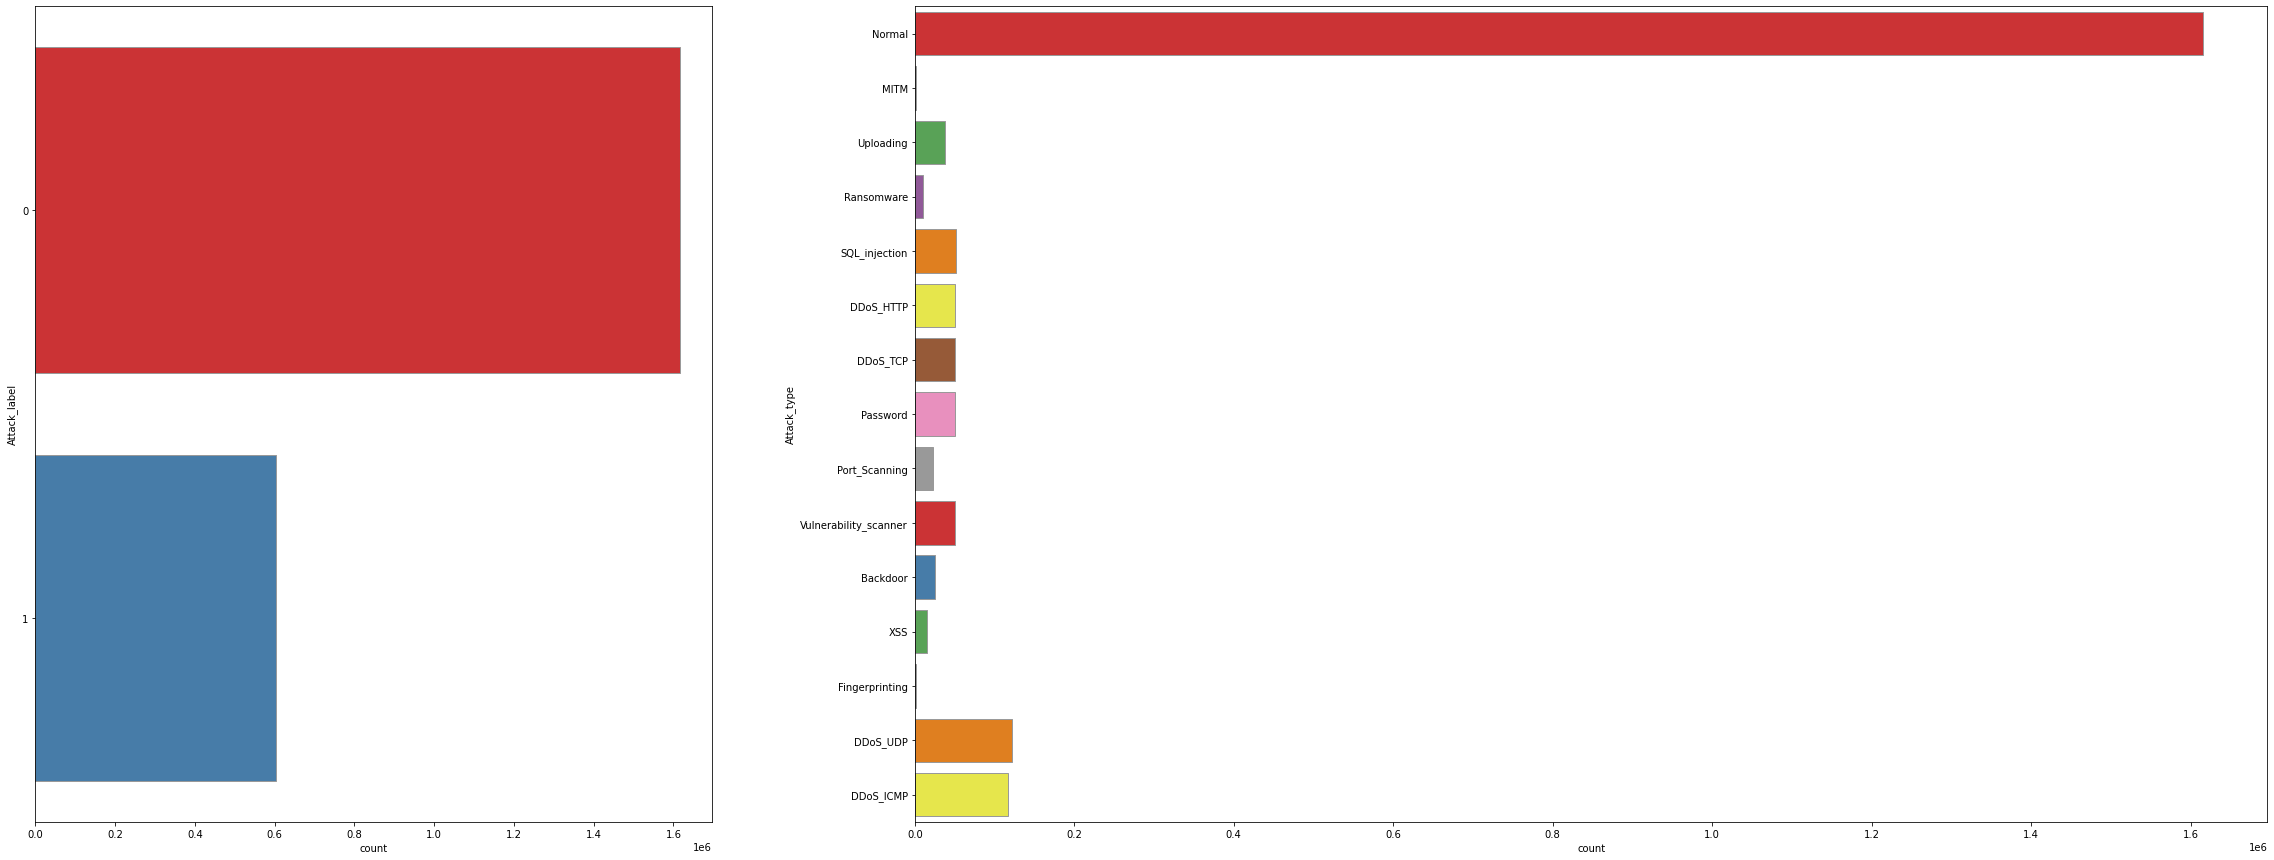

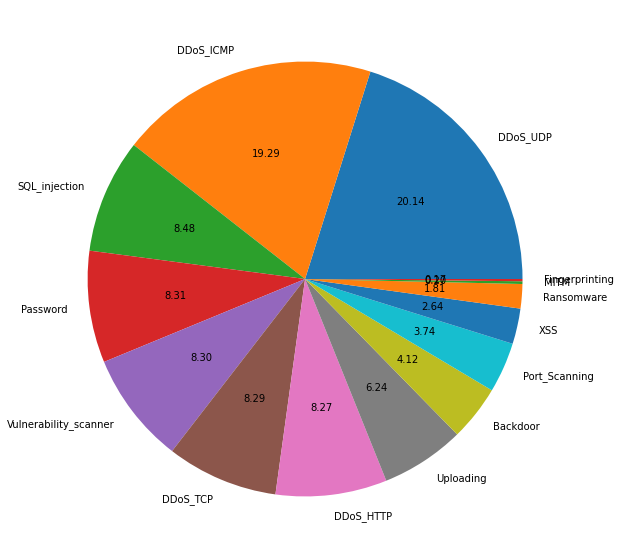

In [ ]:
plot_count_dataset(dataset_origine)

In [ ]:
affiche_dataset_informations(dataset_origine,8)

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,tcp.connection.rst,tcp.connection.syn,tcp.connection.synack,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.seq,udp.port,udp.stream,udp.time_delta,dns.qry.name,dns.qry.qu,dns.qry.type,dns.retransmission,dns.retransmit_request,dns.retransmit_request_in,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06
mean,3.323268e-03,1.582732e-02,1.730285e+03,1.893064e+03,2.877556e+03,0.0,4.808231e+00,1.469132e-02,0.0,2.278400e+07,1.573687e+09,2.897927e+04,8.686910e-02,9.222779e-02,7.060199e-02,4.524016e-02,2.626435e+04,1.437637e+01,7.385613e-01,1.214432e+02,8.682862e+06,2.867523e+01,7.198890e+04,3.541572e-01,7.374416e+03,7.247068e-02,0.0,1.179884e-02,2.208002e-05,1.802451e-05,3.741662e-02,7.483324e-02,1.197063e+01,1.982731e+00,0.0,7.481643e-01,1.496665e-01,8.977934e-01,1.496665e-01,1.297764e-03,5.170780e-03,9.417804e-05,2.719709e-01
std,6.843237e-02,3.077555e-01,8.526581e+03,8.870474e+03,4.705188e+05,0.0,9.642259e+01,1.203142e-01,0.0,1.649033e+08,1.337361e+09,2.065386e+04,2.816432e-01,2.893473e-01,2.561589e-01,2.078305e-01,2.750352e+04,8.232028e+00,4.394185e-01,4.996815e+02,3.476928e+07,1.185792e+03,3.654767e+05,1.153177e+01,1.191786e+05,6.182116e+00,0.0,5.641567e-01,4.698887e-03,4.245490e-03,1.897805e-01,3.795610e-01,4.321738e+01,7.648797e+00,0.0,2.701086e+00,7.591219e-01,4.554231e+00,7.591219e-01,1.711483e-01,7.226807e-01,1.377313e-02,4.449751e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,4.260962e+07,9.951000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.883000e+03,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,6.000000e+00,1.426945e+09,2.843400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.321000e+03,1.600000e+01,1.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,5.900000e+01,2.506984e+09,4.699400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.file_data,http.content_length,http.request.uri.query,http.request.method,http.referer,http.request.full_uri,http.request.version,http.response,http.tls_port,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,tcp.connection.rst,tcp.connection.syn,tcp.connection.synack,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.options,tcp.payload,tcp.seq,tcp.srcport,udp.port,udp.stream,udp.time_delta,dns.qry.name,dns.qry.name.len,dns.qry.qu,dns.qry.type,dns.retransmission,dns.retransmit_request,dns.retransmit_request_in,mqtt.conack.flags,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msg_decoded_as,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.153346e+09,47892.0,0.0,0.0,0.0,1.0,64855.0,18.0,1.0,0.0,020405b40101040201030307,0,0.0,1883.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.447945e+08,16077.0,0.0,0.0,0.0,0.0,1883.0,24.0,1.0,14.0,0,100c00044d5154540402003c0000,1.0,64855.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,2.0,16.0,12.0,0.0,0,1.0,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.153346e+09,62675.0,0.0,0.0,0.0,0.0,64855.0,16.0,1.0,0.0,0,0,1.0,1883.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


,0
frame.time,object
ip.src_host,object
ip.dst_host,object
arp.dst.proto_ipv4,object
arp.opcode,float64
arp.hw.size,float64
arp.src.proto_ipv4,object
icmp.checksum,float64
,0
icmp.seq_le,float64


In [ ]:
tab1=display_count_dataset(dataset_origine,"Attack_label") 
tab2=display_count_dataset(dataset_origine,"Attack_type") 
# display(tab1)
# display(tab2)
display_html(tab2.style.set_table_attributes("style='display:inline'")._repr_html_()+tab1.style.set_table_attributes("style='display:inline'")._repr_html_(), raw=True)


,Attack_type,count,%
0,Backdoor,24862,1.120313
1,DDoS_HTTP,49911,2.249053
2,DDoS_ICMP,116436,5.246753
3,DDoS_TCP,50062,2.255857
4,DDoS_UDP,121568,5.478008
5,Fingerprinting,1001,0.045106
6,MITM,1214,0.054704
7,Normal,1615643,72.802914
8,Password,50153,2.259958
9,Port_Scanning,22564,1.016762


## **preparing Dataset**

In [ ]:
df= dataset_origine.copy()

In [ ]:
# Drop columns with Dtype object 
df.drop(["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4","http.file_data","http.request.full_uri",
         "icmp.transmit_timestamp","http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport","tcp.dstport", "udp.port", "mqtt.msg"]
        ,axis=1, inplace=True)
# duplicate rows will be dropped  
df.drop_duplicates(subset=None, keep="first", inplace=True)
# change finite and infinit value to Nan, after that fill Nan value with 0
with pd.option_context('mode.use_inf_as_null', True):
  df.fillna(0, axis=1, inplace=True) 
  #df.dropna(axis=0, how='any', inplace=True)

In [ ]:
#shuffle the data 
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Encode features with type object to features with type float ( mendatory)
labelencoder = LabelEncoder()
df['http.request.method'] = labelencoder.fit_transform(df['http.request.method'])
df['http.referer'] = labelencoder.fit_transform(df['http.referer'])
df['http.request.version'] = labelencoder.fit_transform(df['http.request.version'])
df['mqtt.protoname'] = labelencoder.fit_transform(df['mqtt.protoname'])
df['mqtt.topic'] = labelencoder.fit_transform(df['mqtt.topic'])
df['dns.qry.name.len'] = labelencoder.fit_transform(df['dns.qry.name.len'])
df['mqtt.conack.flags'] = labelencoder.fit_transform(df['mqtt.conack.flags'])

In [ ]:
# Encoding and Normalizaing data-base
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['Attack_label']])
y_dataset = pd.DataFrame(enc.transform(df[['Attack_label']]).toarray())
y_dataset = (y_dataset.values)

In [ ]:
x_dataset  = df.drop(['Attack_type', 'Attack_label'], axis=1)
x_columns = x_dataset.columns
x_dataset = x_dataset[x_columns].values

In [ ]:
# i used normalisation by sklearn lib: rescales the values into a range of [-1,1].
scaler = StandardScaler()
x_dataset = scaler.fit_transform(x_dataset)

In [ ]:
# splitiing the data  (train / validation)
train_data, test_data, train_labels, test_labels = train_test_split(x_dataset, 
                                                                    y_dataset, 
                                                                    test_size=0.2, 
                                                                    stratify=y_dataset)

In [ ]:
print("train_data.shape"+str(train_data.shape)+'\n test_data.shape'+str(test_data.shape))

train_data.shape(1527736, 46)
 test_data.shape(381935, 46)


---

# =======================================================================

---
<Center><h1>MAIN WORK</h1></center>

---

# =======================================================================

---









# **Deep Neural Network (DNN)**


## Binary Classification : Shallow Neural Network

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn 
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import numpy as np
from scipy import interp
from sklearn.metrics import roc_curve, auc

is_cnn = 0
is_rnn = 0
n_classes = 2

def plot_loss(history):
  training_loss = history.history['loss']
  test_loss = history.history['val_loss']
  epoch_count = range(1, len(training_loss) + 1)
  plt.plot(epoch_count, training_loss, 'r--')
  plt.plot(epoch_count, test_loss, 'b-')
  plt.legend(['Training Loss', 'Validation Loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show();

def plot_accuracy(history):
  training_accuracy = history.history['accuracy']
  test_accuracy = history.history['val_accuracy']
  epoch_count = range(1, len(training_accuracy) + 1)
  plt.plot(epoch_count, training_accuracy, 'r--')
  plt.plot(epoch_count, test_accuracy, 'b-')
  plt.legend(['Training Accuracy', 'Validation Accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.show();

  
def get_classes_report(test_data):
  
  snn_pred = model.predict(test_data, batch_size=1000, verbose=1)
  pred = np.round(snn_pred)

  target_strings = ['Normal', 'Attack']
  print(classification_report( test_labels, pred,  target_names=target_strings))
  return snn_pred, pred





def get_con_matrix(snn_predicted):
  #confusion matrix
  #normalize='true')
  target_strings = {0:'Normal', 1:'Attack'}

  snn_cm = confusion_matrix(test_labels.argmax(axis=1), pred.argmax(axis=1)) 
  # Visualiamos la matriz de confusión 
  snn_df_cm = pd.DataFrame(snn_cm,  target_strings, target_strings)
  plt.figure(figsize = (12,8)) 
  sn.set(font_scale=1.4) #for label size 
  sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 10}) # font size 
  plt.show()
  
  return snn_cm
  
def true_false_rate(cm):
  fpr = (np.sum(cm[0,1:]))/ np.sum(cm[0,:])
  tp = np.sum([sum([row[i] for row in cm]) for i in range(1,len(cm))])
  fn = np.sum(cm[1:,0])
  tpr = tp / (tp+fn)
  print("TPR = %f \nFPR = %f."%(tpr , fpr))


def plt_roc_curves(snn_pred):
    # Plot linewidth.
  lw = 1

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], snn_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), snn_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot ROC.
  plt.figure(figsize = (7,7)) 
  plt.xlim(0, 1)
  plt.ylim(0, 1)
  plt.plot(fpr["micro"], tpr["micro"],
          label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
          color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
          label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4) 
  
  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curves')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
def DNN_Binary_model(train_data):
    model = Sequential()
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.add(Dense(train_data.shape[1], input_dim=train_data.shape[1], kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(train_labels.shape[1],activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model

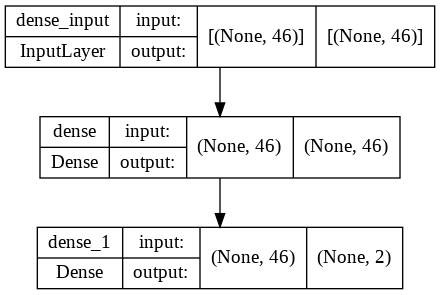

In [ ]:
tf.keras.backend.clear_session()
model = DNN_Binary_model(train_data)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Epoch 1/3
306/306 - 2s - loss: 4.0346e-05 - accuracy: 1.0000 - val_loss: 4.1452e-05 - val_accuracy: 1.0000 - 2s/epoch - 7ms/step
Epoch 2/3
306/306 - 1s - loss: 2.6291e-05 - accuracy: 1.0000 - val_loss: 2.4302e-05 - val_accuracy: 1.0000 - 1s/epoch - 5ms/step
Epoch 3/3
306/306 - 1s - loss: 2.3333e-05 - accuracy: 1.0000 - val_loss: 2.0491e-05 - val_accuracy: 1.0000 - 1s/epoch - 5ms/step


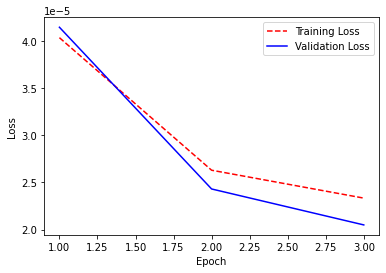

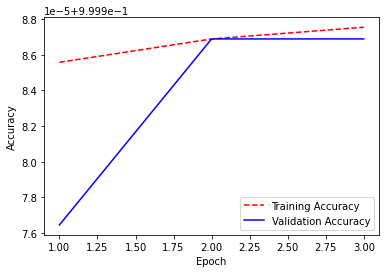

In [ ]:

history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), batch_size=5000, epochs=3, verbose=2)
plot_loss(history)
plot_accuracy(history)

In [ ]:
snn_pred, pred = get_classes_report(test_data)
expected = test_labels
predicted=pred
accuracy = accuracy_score(expected, predicted)

382/382 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    272800
      Attack       1.00      1.00      1.00    109135

   micro avg       1.00      1.00      1.00    381935
   macro avg       1.00      1.00      1.00    381935
weighted avg       1.00      1.00      1.00    381935
 samples avg       1.00      1.00      1.00    381935



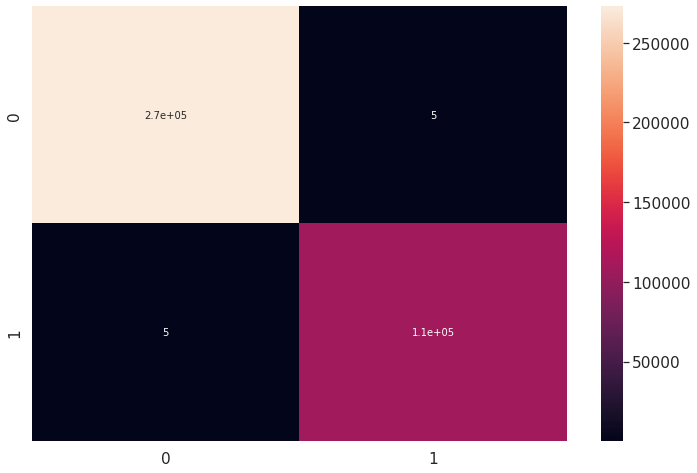

TPR = 0.999954 
FPR = 0.000018.


In [ ]:
cm = get_con_matrix(pred)
true_false_rate(cm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


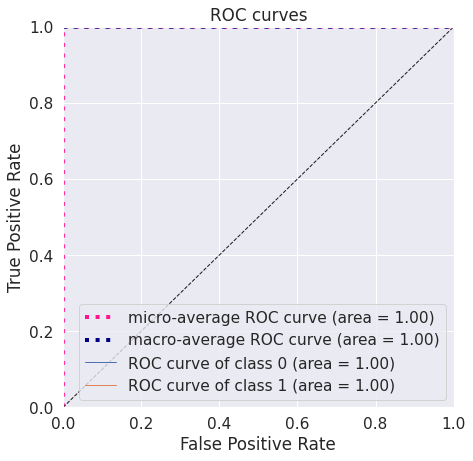

In [ ]:
plt_roc_curves(snn_pred)

In [ ]:
cm2=cm.reshape(-1)
normal_array = cm2/sum(cm2)
print('true positif = '+'%f' % (normal_array[0]*100)+"%  |  "+str(cm[0,0])+'  cas')
print('true negatif = '+'%f' % (normal_array[3]*100)+"%  |  "+str(cm[1,1])+'  cas')
print('faux negatif = '+'%f' % (normal_array[1]*100)+"%  |  "+str(cm[0,1])+'  cas')
print('faux positif = '+'%f' % (normal_array[2]*100)+"%  |  "+str(cm[1,0])+'  cas')

print('--------------------------------')
print('true %f' % ((normal_array[0]+normal_array[3])*100))
print('faux %f' % ((normal_array[1]+normal_array[2])*100))

print("Accuracy: ")
print("%.3f" %accuracy)

true positif = 71.424457%  |  272795  cas
true negatif = 28.572925%  |  109130  cas
faux negatif = 0.001309%  |  5  cas
faux positif = 0.001309%  |  5  cas
--------------------------------
true 99.997382
faux 0.002618
Accuracy: 
1.000


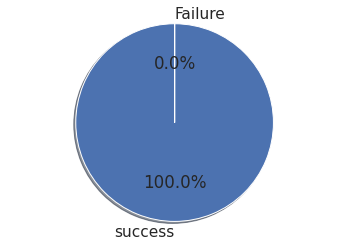

In [ ]:
labels =  "success","Failure"
sizes = [cm[0,0]+cm[1,1],cm[1,0]+cm[0,1]]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)  
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()